## Solutions

### Exercise 1

First let’s compute the duopoly MPE under the stated parameters

In [7]:
# == Parameters == #
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# == In LQ form == #
A  = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])
R1 = [[      0.,      -a0/2,          0.],
      [-a0 / 2.,         a1,     a1 / 2.],
      [       0,    a1 / 2.,          0.]]

R2 = [[     0.,          0.,     -a0 / 2],
      [     0.,          0.,     a1 / 2.],
      [-a0 / 2,     a1 / 2.,          a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# == Solve using QE's nnash function == #
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1,
                          Q2, S1, S2, W1, W2, M1,
                          M2, beta=β)

Now we evaluate the time path of industry output and prices given
initial condition $ q_{10} = q_{20} = 1 $

In [8]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

Next let’s have a look at the monopoly solution

For the state and control we take

$$
x_t = q_t - \bar q
\quad \text{and} \quad
u_t = q_{t+1} - q_t
$$

To convert to an LQ problem we set

$$
R = a_1
\quad \text{and} \quad
Q = \gamma
$$

in the payoff function $ x_t' R x_t + u_t' Q u_t $ and

$$
A = B = 1
$$

in the law of motion $ x_{t+1} = A x_t + B u_t $

We solve for the optimal policy $ u_t = - Fx_t $ and track the
resulting dynamics of $ \{q_t\} $, starting at $ q_0 = 2.0 $

In [9]:
R = a1
Q = γ
A = B = 1
lq_alt = qe.LQ(Q, R, A, B, beta=β)
P, F, d = lq_alt.stationary_values()
q_bar = a0 / (2.0 * a1)
qm = np.empty(n)
qm[0] = 2
x0 = qm[0] - q_bar
x = x0
for i in range(1, n):
    x = A * x - B * F * x
    qm[i] = float(x) + q_bar
pm = a0 - a1 * qm

Let’s have a look at the different time paths

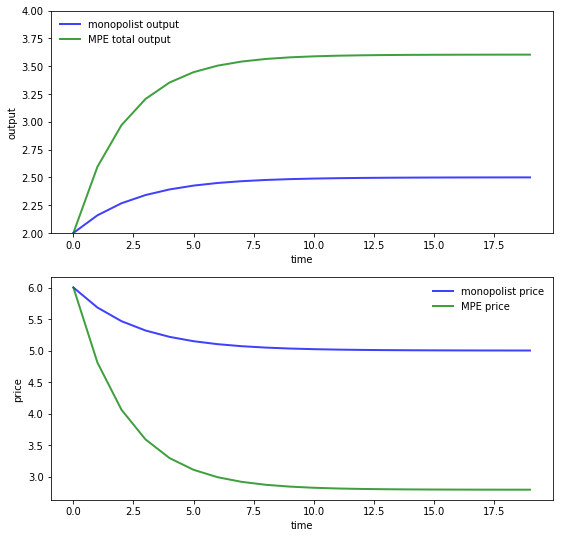

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(qm, 'b-', lw=2, alpha=0.75, label='monopolist output')
ax.plot(q, 'g-', lw=2, alpha=0.75, label='MPE total output')
ax.set(ylabel="output", xlabel="time", ylim=(2, 4))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(pm, 'b-', lw=2, alpha=0.75, label='monopolist price')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='MPE price')
ax.set(ylabel="price", xlabel="time")
ax.legend(loc='upper right', frameon=0)
plt.show()

### Exercise 2

We treat the case $ \delta = 0.02 $

In [11]:
δ = 0.02
D = np.array([[-1, 0.5], [0.5, -1]])
b = np.array([25, 25])
c1 = c2 = np.array([1, -2, 1])
e1 = e2 = np.array([10, 10, 3])

δ_1 = 1 - δ

Recalling that the control and state are

$$
u_{it} =
\begin{bmatrix}
    p_{it} \\
    q_{it}
\end{bmatrix}
\quad \text{and} \quad
x_t =
\begin{bmatrix}
    I_{1t} \\
    I_{2t} \\
    1
\end{bmatrix}
$$

we set up the matrices as follows:

In [12]:
# ==  Create matrices needed to compute the Nash feedback equilibrium == #

A = np.array([[δ_1,      0,    -δ_1 * b[0]],
              [  0,    δ_1,    -δ_1 * b[1]],
              [  0,      0,             1]])

B1 = δ_1 * np.array([[1, -D[0, 0]],
                     [0, -D[1, 0]],
                     [0,       0]])
B2 = δ_1 * np.array([[0, -D[0, 1]],
                     [1, -D[1, 1]],
                     [0,       0]])

R1 = -np.array([[0.5 * c1[2],     0,    0.5 * c1[1]],
                [          0,     0,              0],
                [0.5 * c1[1],     0,         c1[0]]])
R2 = -np.array([[0,               0,              0],
                [0,     0.5 * c2[2],    0.5 * c2[1]],
                [0,     0.5 * c2[1],         c2[0]]])

Q1 = np.array([[-0.5 * e1[2], 0], [0, D[0, 0]]])
Q2 = np.array([[-0.5 * e2[2], 0], [0, D[1, 1]]])

S1 = np.zeros((2, 2))
S2 = np.copy(S1)

W1 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e1[1],    b[0] / 2.]])
W2 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e2[1],    b[1] / 2.]])

M1 = np.array([[0, 0], [0, D[0, 1] / 2.]])
M2 = np.copy(M1)

We can now compute the equilibrium using `qe.nnash`

In [13]:
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1,
                          R2, Q1, Q2, S1,
                          S2, W1, W2, M1, M2)

print("\nFirm 1's feedback rule:\n")
print(F1)

print("\nFirm 2's feedback rule:\n")
print(F2)


Firm 1's feedback rule:

[[ 2.43666582e-01  2.72360627e-02 -6.82788293e+00]
 [ 3.92370734e-01  1.39696451e-01 -3.77341073e+01]]

Firm 2's feedback rule:

[[ 2.72360627e-02  2.43666582e-01 -6.82788293e+00]
 [ 1.39696451e-01  3.92370734e-01 -3.77341073e+01]]


Now let’s look at the dynamics of inventories, and reproduce the graph
corresponding to $ \delta = 0.02 $

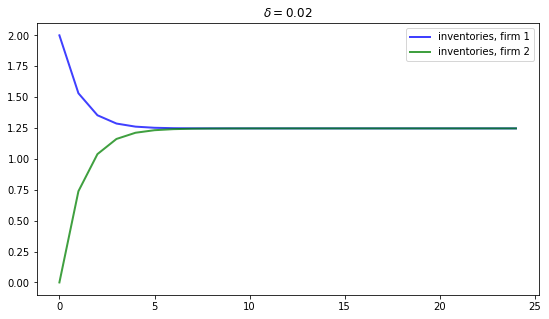

In [14]:
AF = A - B1 @ F1 - B2 @ F2
n = 25
x = np.empty((3, n))
x[:, 0] = 2, 0, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
I1 = x[0, :]
I2 = x[1, :]
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(I1, 'b-', lw=2, alpha=0.75, label='inventories, firm 1')
ax.plot(I2, 'g-', lw=2, alpha=0.75, label='inventories, firm 2')
ax.set_title(rf'$\delta = {δ}$')
ax.legend()
plt.show()